# <center> Page View Time Series Visualizer </center>
<br/>
<br/>
<br/>
<br/>


## What is this?
---
This is a freeCodeCamp project for the Data Analysis with Python certification.

Bellow is the project from freeCodeCamp.

> ## Page View Time Series Visualizer
> You will be working on [this project with our Replit starter code.](https://replit.com/github/freeCodeCamp/boilerplate-page-view-time-series-visualizer)
> 
> - Start by importing the project on Replit.
> - Next, you will see a `.replit` window.
> - Select `Use run command` and click the `Done` button.
> We are still developing the interactive instructional part of the Python curriculum. For now, here are some videos on the freeCodeCamp.org YouTube channel that will teach you everything you need to know to complete this project:
> 
> [Python for Everybody Video Course (14 hours)](https://www.freecodecamp.org/news/python-for-everybody/)
> 
> [How to Analyze Data with Python Pandas (10 hours)](https://www.freecodecamp.org/news/how-to-analyze-data-with-python-pandas/])
> 
> For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.
> 
> Use the data to complete the following tasks:
> 
> - Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
> - Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
> - Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
> - Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
> - Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
>
> For each chart, make sure to use a copy of the data frame. Unit tests are written for you under `test_module.py`.
> 
> The boilerplate also includes commands to save and return the image.
> 
> ### Development
> For development, you can use `main.py` to test your functions. Click the "run" button and main.py will run.
> 
> ### Testing
> We imported the tests from `test_module.py` to `main.py` for your convenience. The tests will run automatically whenever you hit the "run" button.
> 
> ### Submitting
> Copy your project's URL and submit it to freeCodeCamp.

### Imports
---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

### read csv
--- 

In [360]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])

### Filter out the bottom and top .25 percent 
---

In [361]:
df = df[ ( df['value'] > df['value'].quantile(0.025) ) 
   & ( df['value'] < df['value'].quantile(0.975) )]

### How to Choose dates from the date column
---
&nbsp;&nbsp;&nbsp;&nbsp; This is how you select a specific month and day from the date column using the date time feature of the dataframe.

In [387]:
df[ (df['date'].dt.month == 1) & (df['date'].dt.day == 1) | 
    (df['date'].dt.month == 7) & (df['date'].dt.day == 1)]['date']

53     2016-07-01
237    2017-01-01
418    2017-07-01
602    2018-01-01
783    2018-07-01
967    2019-01-01
1148   2019-07-01
Name: date, dtype: datetime64[ns]

### Draw the line plot 
---

In [385]:
def draw_line_plot():
    # Draw line plot

    ax = sns.lineplot( data=df, x = 'date', y = 'value')
    ax.set_title( 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019' )
    ax.set_xlabel( 'Date' )
    ax.set_ylabel( 'Page Views' )
    

    fig = ax.figure
    fig.set_facecolor( 'white' )
    fig.set_size_inches( (20,5) )
    
    # fig = sns.relplot(data=df, x='date', y='value')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

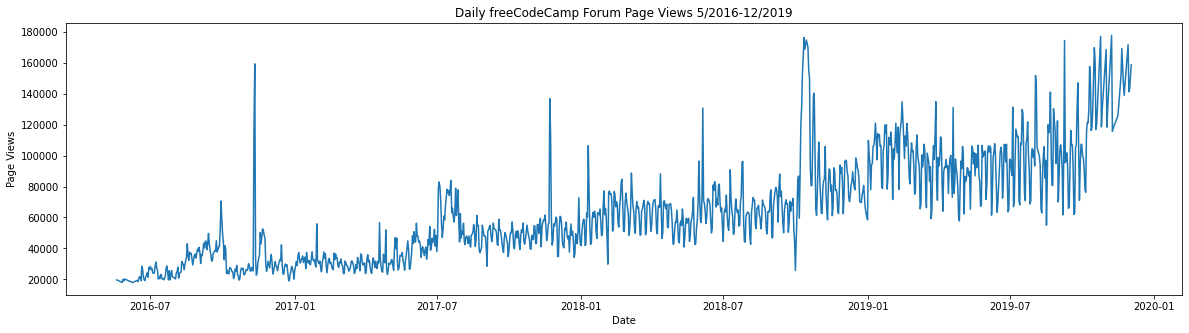

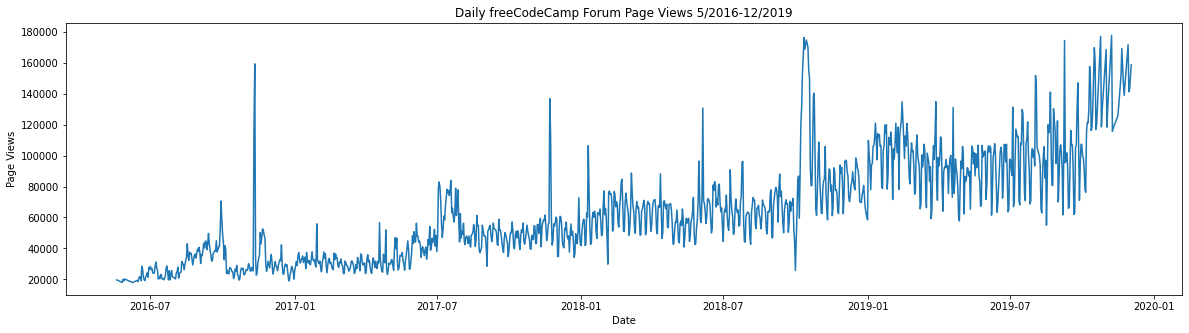

In [386]:
draw_line_plot()

### Sort by month and average
---

In [263]:
df_dates = df.index
df_values = df.values

for d in df_dates:
  print( d.month_name() )

May
May
May
May
May
June
June
June
June
June
June
June
June
June
June
June
June
June
June
June
June
June
June
June
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
July
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
August
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
September
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
October
Octo

In [264]:
tmpMonth = ''
daysCount = 0
totViews = 0
monthsAvgViews = []
for d, v in df.iterrows() :
  if tmpMonth != d.month_name() :
    if totViews > 0:
      monthsAvgViews.append( [tmpMonth, totViews/daysCount] )
    tmpMonth = d.month_name()
    daysCount = 0
    totViews = 0
  else:
    daysCount += 1
    totViews += v.value


print( pd.DataFrame(monthsAvgViews) )

            0              1
0         May   19356.500000
1        June   22071.777778
2        July   23951.814815
3      August   31385.933333
4   September   41503.344828
5     October   26672.300000
6    November   40951.827586
7    December   27671.300000
8     January   33005.166667
9    February   31149.703704
10      March   29239.466667
11      April   31124.137931
12        May   34366.433333
13       June   43585.827586
14       July   66736.133333
15     August   47746.700000
16  September   47357.413793
17    October   47725.500000
18   November   58112.965517
19   December   48073.600000
20    January   59139.100000
21   February   65674.407407
22      March   62569.466667
23      April   62562.103448
24        May   56551.466667
25       June   70019.448276
26       July   64225.700000
27     August   62808.666667
28  September   66590.965517
29    October  114546.592593
30   November   78441.000000
31   December   80636.633333
32    January  103508.133333
33   February 

### Draw the bar plot
---

In [266]:

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
  
    Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    # df_bar should be the average page views per month
    df_bar = None
    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig